In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importamos los datos para ver con qué información contamos y verificamos si de primera instancia hay una columna que tentativamente se pudiera eliminar.

In [85]:
path = './Automobile.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Ya que no contamos con toda la información necesaria para poder descartar alguna columna, por ahora se mantendrán todas.

Verificaremos los tipos de datos de cada columna para saber cómo proceder en caso de que alguna se tenga que modificar, ya que las variables se tratarán de diferente manera dependiendo de su clasificación (numérica o categórica).

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   number-of-doors    205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Ahora analizaremos el porcentaje de datos faltantes de cada columna para poder ser más acertivos al momento de limpiar la información

In [14]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
number-of-doors      0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Podemos observar que no hay datos faltantes, pero si observamos la tabla superior, sí hay datos que nos interesa limpiar. Es por esto por lo que buscaremos el caracter que nos interesa reemplazar (en este caso el signo ?).

In [86]:
df['price'].value_counts()
df2 = df.copy()
df2['price'].replace("?", np.nan,inplace=True)
df2.dropna(inplace=True)


Ya que en la columna 'price' sólo había 4 registros faltantes, se consideró que la forma más rápida de proceder sería eliminándolos.

Ahora cambiaremos el tipo de dato a float para poder graficarlo más adelante.

In [87]:
df2['price'] = df2['price'].astype(float)

Nuestra intuición nos dice que el número de cilindros y los caballos de fuerza pueden ser variables importantes para definir el precio de un vehículo, así que limpiaremos las columnas para poder graficarla más adelante.

In [88]:
df2['num-of-cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

Ya que los valores no son numéricos, haremos uso de la función 'map' para poder transformar el número de cilindros a integer

In [89]:
df2["num-of-cylinders"] = df2["num-of-cylinders"].map({'four': 4,'six':6,'five': 5,'two':2,'eight':8,'three':3,'twelve':12})
df2['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 201, dtype: int64

Para el caso de los caballos de fuerza, haremos lo mismo que para la columna 'price', ya que las circunstancias son similares.

In [94]:
(df2['horsepower'] == '?').sum()
df2['horsepower'].replace("?", np.nan,inplace=True)
df2.dropna(inplace=True)


In [101]:
df2['horsepower'] = df2['horsepower'].astype(float)
df2['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 199, dtype: float64


Creamos un histograma de la disribución de las variables para saber si se deben normalizar y qué tipo de distribucion usar.

C:\Users\Razer\AppData\Local\Temp\ipykernel_20224\73410823.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(ax=ax)


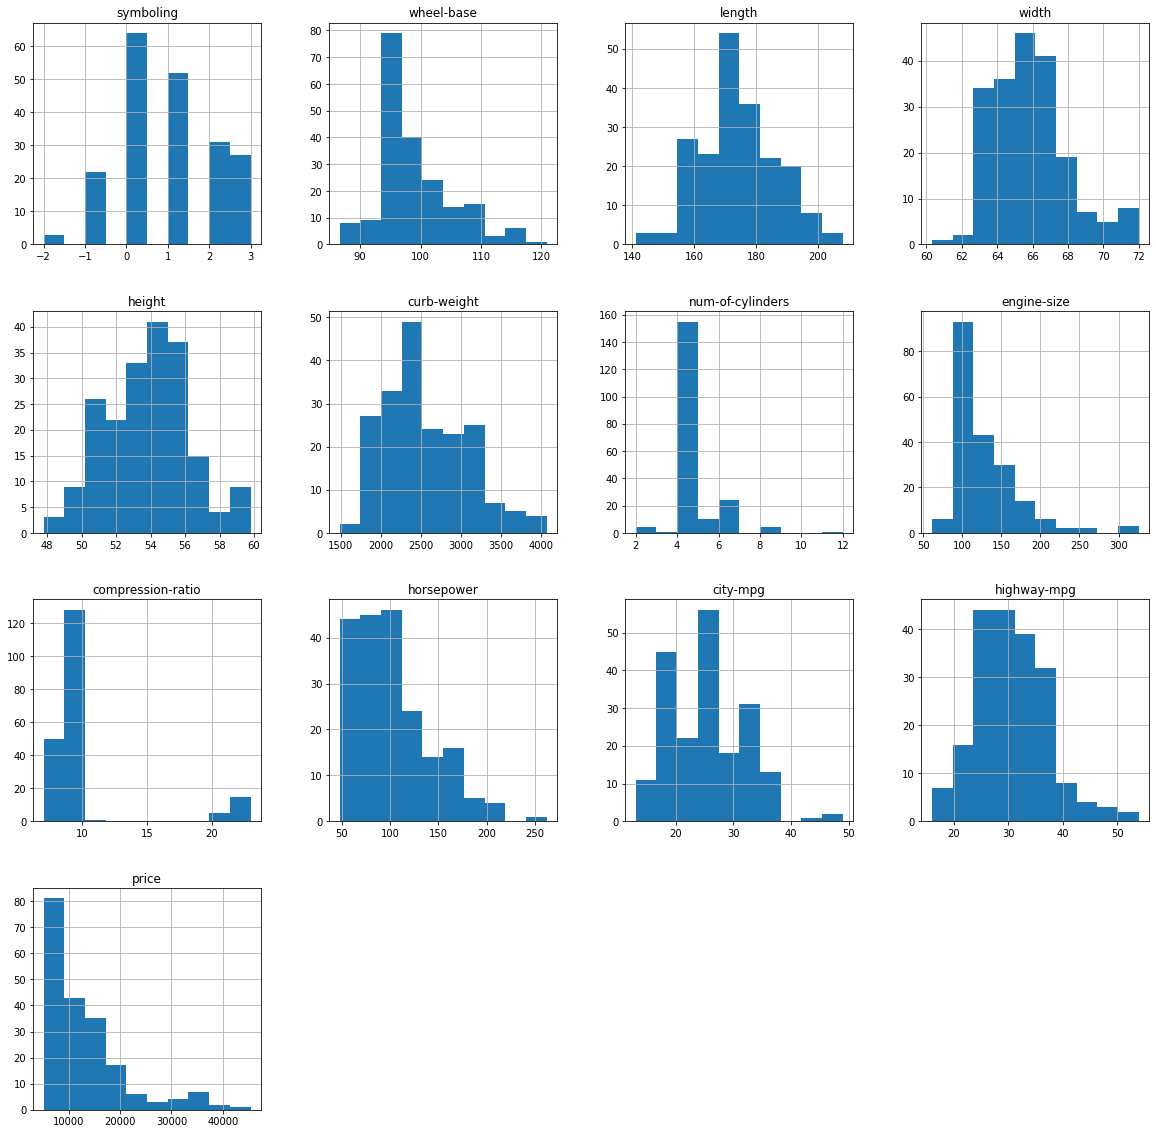

In [102]:
#Creamos un histograma para cada una de las variables numericas usando hist()
fig, ax = plt.subplots(figsize=(20,20))
df2.hist(ax=ax)
plt.show()

Ahora, con ayuda de un boxplot identificaremos los outiers para hacer una buena decisión de las variables que seleccionaremos

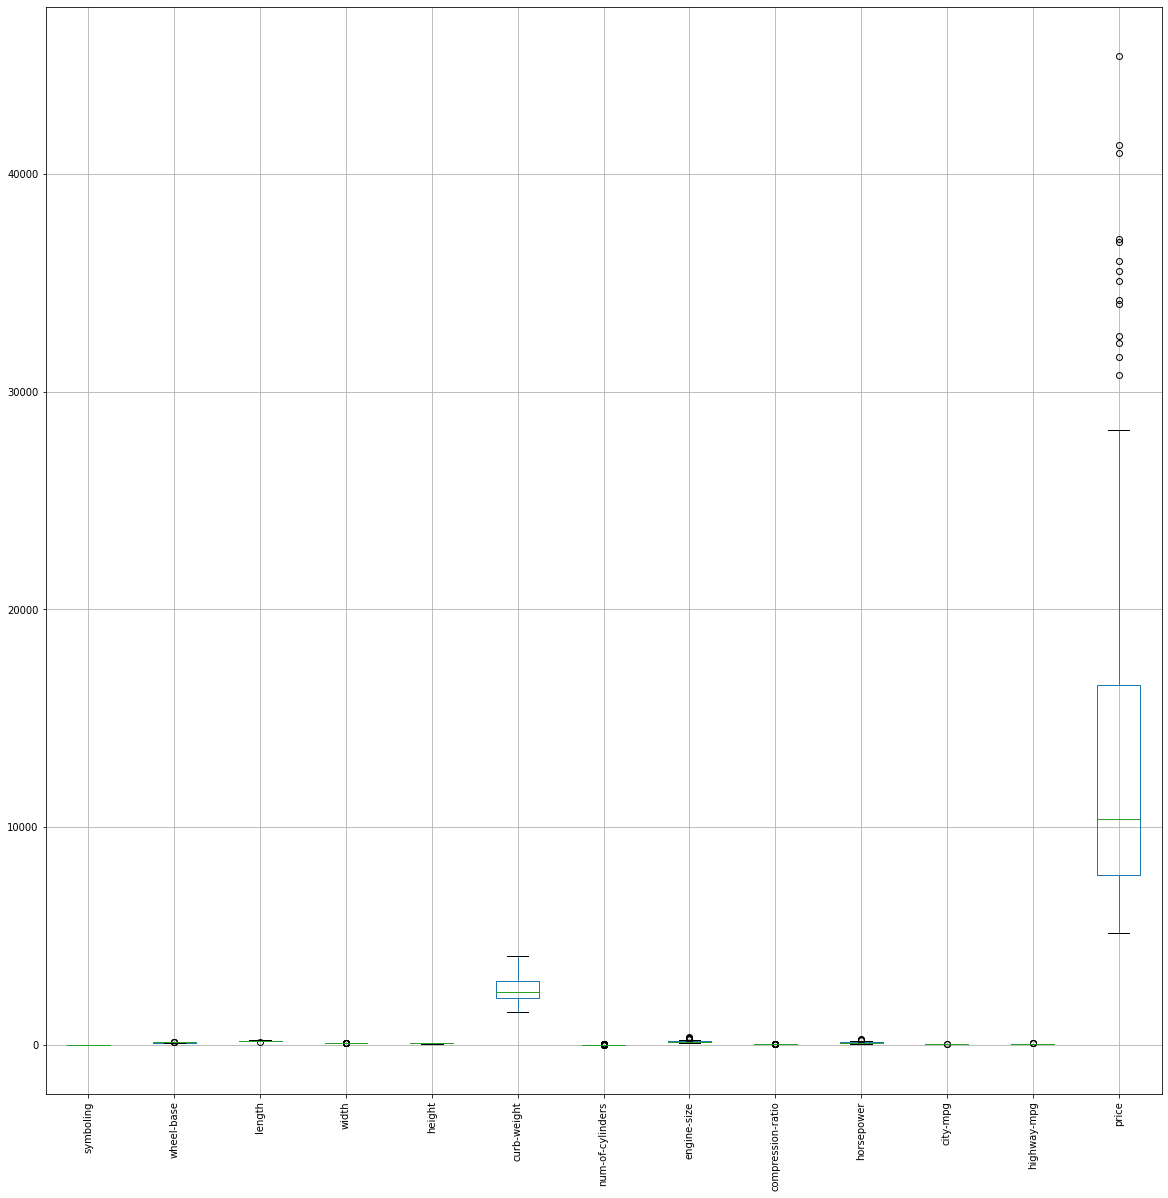

In [106]:
fig, ax = plt.subplots(figsize=(20,20))
df2.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

Podemos observar que la columna de precios tiene una cantidad significativa de outliers, pero debido a la escala, los outliers de las otras columnas no son visibles. Para solucionar esto, haremos un boxplot omitiendo las columnas 'price' y 'curb-weight'.



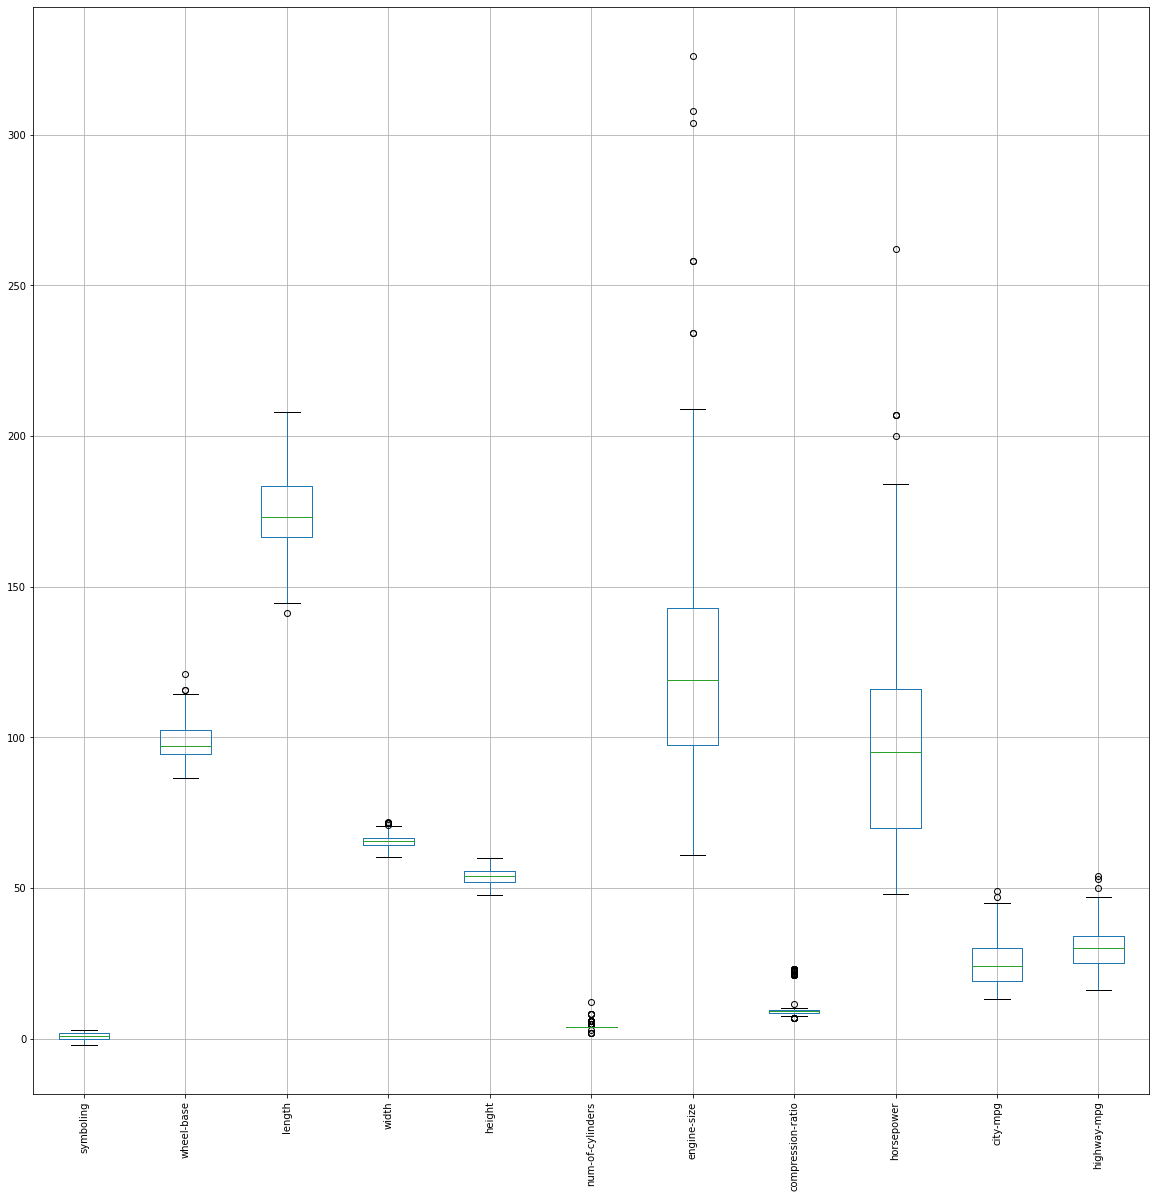

In [109]:
df3 = df2.drop(["price", "curb-weight"], axis=1)
fig, ax = plt.subplots(figsize=(20,20))
df3.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

Ya que sustituimos los valores que no nos interesan e identificamos las posibles distribuciones de las variables, verificaremos la correlación entre ellas (x) y la variable que nos interesa calcular (y).

In [105]:
corr = df2.corr()
corr

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.118031,-0.111110,-0.182446,0.076038,-0.035228,0.036293,-0.082465
wheel-base,-0.537706,1.000000,0.879582,0.817145,0.592809,0.782636,0.347946,0.573197,0.249088,0.371621,-0.472877,-0.543647,0.583797
length,-0.365957,0.879582,1.000000,0.857225,0.494880,0.881688,0.442442,0.685260,0.161486,0.580309,-0.664865,-0.699033,0.693965
width,-0.243933,0.817145,0.857225,1.000000,0.309223,0.866965,0.521779,0.729466,0.191254,0.615315,-0.633139,-0.681131,0.753871
height,-0.546717,0.592809,0.494880,0.309223,1.000000,0.307881,0.006518,0.075569,0.259914,-0.087407,-0.051387,-0.105200,0.134990
curb-weight,-0.232893,0.782636,0.881688,0.866965,0.307881,1.000000,0.604626,0.849301,0.156294,0.758063,-0.750287,-0.794937,0.835090
num-of-cylinders,-0.118031,0.347946,0.442442,0.521779,0.006518,0.604626,1.000000,0.848635,-0.019429,0.669179,-0.441125,-0.473873,0.708236
engine-size,-0.111110,0.573197,0.685260,0.729466,0.075569,0.849301,0.848635,1.000000,0.029366,0.822713,-0.650552,-0.679688,0.873887
compression-ratio,-0.182446,0.249088,0.161486,0.191254,0.259914,0.156294,-0.019429,0.029366,1.000000,-0.214576,0.330587,0.268819,0.069549
horsepower,0.076038,0.371621,0.580309,0.615315,-0.087407,0.758063,0.669179,0.822713,-0.214576,1.000000,-0.822617,-0.804596,0.810533


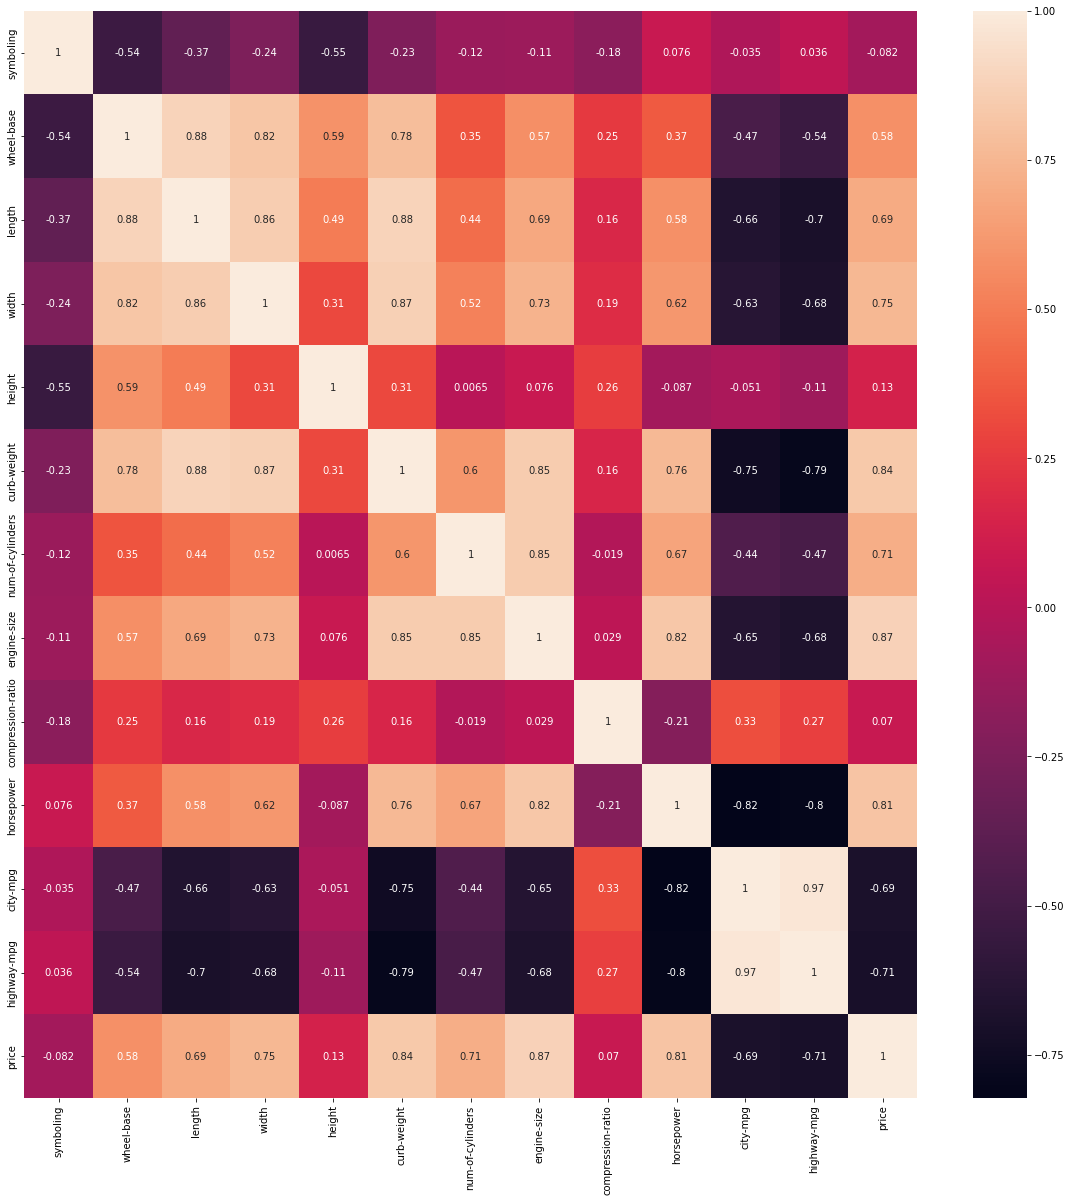

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

Usando el mapa de calor, podemos identificar algunas variables que tienen una alta correlación con la variable buscada (price), como por ejemplo 'horsepower' o 'engine-size'

Podemos observar que pese a que estas variables son tentativamente buenas, también están fuertemente correlacionadas con las otras variables, por lo que probablemente sería buena idea limpiar las otras columnas para alguna de ellas no presenta este problema o comenzar a descartar columnas para reducir el coeficiente de multicolinearidad